In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import set_config

set_config(transform_output='pandas')
churn_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', na_values=' ', index_col='customerID')
churn_data.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


<Axes: xlabel='Churn', ylabel='Count'>

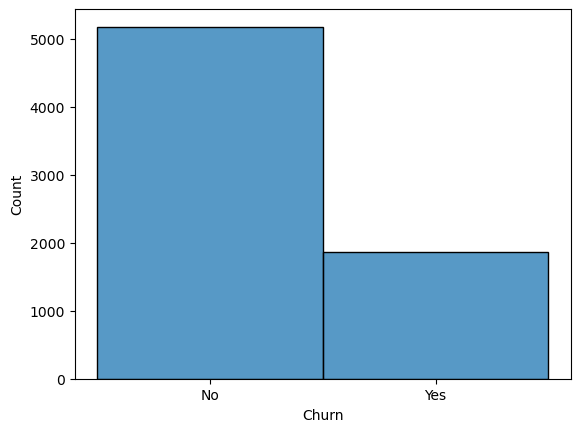

In [2]:
sns.histplot(x='Churn', data=churn_data)

In [3]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=False, random_state=None)

idxs = kf.split(churn_data)

In [4]:
for i, idx in enumerate(idxs):
    print(f'Iteration {i}:')
    print(f'First 5 train indeces: {idx[0][:5]}')
    print(f'Last 5 train indeces: {idx[0][-5:]}')
    print(f'First 5 test indeces: {idx[1][:5]}')
    print(f'Last 5 test indeces: {idx[1][-5:]}\n')

Iteration 0:
First 5 train indeces: [1409 1410 1411 1412 1413]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [0 1 2 3 4]
Last 5 test indeces: [1404 1405 1406 1407 1408]

Iteration 1:
First 5 train indeces: [0 1 2 3 4]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [1409 1410 1411 1412 1413]
Last 5 test indeces: [2813 2814 2815 2816 2817]

Iteration 2:
First 5 train indeces: [0 1 2 3 4]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [2818 2819 2820 2821 2822]
Last 5 test indeces: [4222 4223 4224 4225 4226]

Iteration 3:
First 5 train indeces: [0 1 2 3 4]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [4227 4228 4229 4230 4231]
Last 5 test indeces: [5630 5631 5632 5633 5634]

Iteration 4:
First 5 train indeces: [0 1 2 3 4]
Last 5 train indeces: [5630 5631 5632 5633 5634]
First 5 test indeces: [5635 5636 5637 5638 5639]
Last 5 test indeces: [7038 7039 7040 7041 7042]



In [5]:
for i, idx in enumerate(idxs):
    print(f'Iteration {i}:')
    print(f'First 5 train indexes: {idx[0][:5]}')
    print(f'Last 5 train indexes: {idx[0][-5:]}')
    print(f'First 5 test indexes: {idx[1][:5]}')
    print(f'Last 5 test indexes: {idx[1][-5:]}\n')

In [6]:
churn_feat = churn_data.drop('Churn', axis=1)
churn_target = churn_data.Churn
kf = KFold(n_splits=5, shuffle=False, random_state=None)

idxs = kf.split(churn_feat, churn_target)
for i, idx in enumerate(idxs):
    print(f'Iteration {i}:')
    print(f'First 5 train indeces: {idx[0][:5]}')
    print(f'Last 5 train indeces: {idx[0][-5:]}')
    print(f'First 5 test indeces: {idx[1][:5]}')
    print(f'Last 5 test indeces: {idx[1][-5:]}\n')

Iteration 0:
First 5 train indeces: [1409 1410 1411 1412 1413]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [0 1 2 3 4]
Last 5 test indeces: [1404 1405 1406 1407 1408]

Iteration 1:
First 5 train indeces: [0 1 2 3 4]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [1409 1410 1411 1412 1413]
Last 5 test indeces: [2813 2814 2815 2816 2817]

Iteration 2:
First 5 train indeces: [0 1 2 3 4]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [2818 2819 2820 2821 2822]
Last 5 test indeces: [4222 4223 4224 4225 4226]

Iteration 3:
First 5 train indeces: [0 1 2 3 4]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [4227 4228 4229 4230 4231]
Last 5 test indeces: [5630 5631 5632 5633 5634]

Iteration 4:
First 5 train indeces: [0 1 2 3 4]
Last 5 train indeces: [5630 5631 5632 5633 5634]
First 5 test indeces: [5635 5636 5637 5638 5639]
Last 5 test indeces: [7038 7039 7040 7041 7042]



In [7]:
from sklearn.model_selection import RepeatedKFold

In [8]:
rkf = RepeatedKFold(n_splits=3, n_repeats=2, random_state=None)

idxs = rkf.split(churn_data)

In [9]:
for i, idx in enumerate(idxs):
    print(f'Iteration {i//3}:')
    print(f'Fold {i%3}:')
    print(f'First 5 train indeces: {idx[0][:5]}')
    print(f'Last 5 train indeces: {idx[0][-5:]}')
    print(f'First 5 test indeces: {idx[1][:5]}')
    print(f'Last 5 test indeces: {idx[1][-5:]}\n')

Iteration 0:
Fold 0:
First 5 train indeces: [1 2 4 5 6]
Last 5 train indeces: [7035 7036 7037 7038 7040]
First 5 test indeces: [ 0  3  8  9 12]
Last 5 test indeces: [7019 7021 7039 7041 7042]

Iteration 0:
Fold 1:
First 5 train indeces: [ 0  3  8  9 10]
Last 5 train indeces: [7037 7039 7040 7041 7042]
First 5 test indeces: [1 2 4 5 6]
Last 5 test indeces: [7031 7033 7034 7036 7038]

Iteration 0:
Fold 2:
First 5 train indeces: [0 1 2 3 4]
Last 5 train indeces: [7036 7038 7039 7041 7042]
First 5 test indeces: [10 14 22 23 31]
Last 5 test indeces: [7030 7032 7035 7037 7040]

Iteration 1:
Fold 0:
First 5 train indeces: [0 2 5 7 9]
Last 5 train indeces: [7033 7037 7039 7040 7042]
First 5 test indeces: [1 3 4 6 8]
Last 5 test indeces: [7034 7035 7036 7038 7041]

Iteration 1:
Fold 1:
First 5 train indeces: [1 3 4 5 6]
Last 5 train indeces: [7034 7035 7036 7038 7041]
First 5 test indeces: [ 0  2  7 12 20]
Last 5 test indeces: [7028 7037 7039 7040 7042]

Iteration 1:
Fold 2:
First 5 train indec

In [10]:
from sklearn.model_selection import LeaveOneOut

In [11]:
loo = LeaveOneOut()
idxs = loo.split(churn_data)

In [12]:
for i, idx in enumerate(idxs):
    if i > 5:
        break
    print(f'Iteration {i}:')
    print(f'First 5 train indeces: {idx[0][:5]}')
    print(f'Last 5 train indeces: {idx[0][-5:]}')
    print(f'First 5 test indeces: {idx[1][:5]}')
    print(f'Last 5 test indeces: {idx[1][-5:]}\n')

Iteration 0:
First 5 train indeces: [1 2 3 4 5]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [0]
Last 5 test indeces: [0]

Iteration 1:
First 5 train indeces: [0 2 3 4 5]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [1]
Last 5 test indeces: [1]

Iteration 2:
First 5 train indeces: [0 1 3 4 5]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [2]
Last 5 test indeces: [2]

Iteration 3:
First 5 train indeces: [0 1 2 4 5]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [3]
Last 5 test indeces: [3]

Iteration 4:
First 5 train indeces: [0 1 2 3 5]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [4]
Last 5 test indeces: [4]

Iteration 5:
First 5 train indeces: [0 1 2 3 4]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [5]
Last 5 test indeces: [5]



In [13]:
from sklearn.model_selection import LeavePOut

In [14]:
lpo = LeavePOut(5)
idxs = lpo.split(churn_data)

In [15]:
for i, idx in enumerate(idxs):
    if i > 5:
        break
    print(f'Iteration {i}:')
    print(f'First 5 train indeces: {idx[0][:5]}')
    print(f'Last 5 train indeces: {idx[0][-5:]}')
    print(f'First 5 test indeces: {idx[1][:5]}')
    print(f'Last 5 test indeces: {idx[1][-5:]}\n')

Iteration 0:
First 5 train indeces: [5 6 7 8 9]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [0 1 2 3 4]
Last 5 test indeces: [0 1 2 3 4]

Iteration 1:
First 5 train indeces: [4 6 7 8 9]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [0 1 2 3 5]
Last 5 test indeces: [0 1 2 3 5]

Iteration 2:
First 5 train indeces: [4 5 7 8 9]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [0 1 2 3 6]
Last 5 test indeces: [0 1 2 3 6]

Iteration 3:
First 5 train indeces: [4 5 6 8 9]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [0 1 2 3 7]
Last 5 test indeces: [0 1 2 3 7]

Iteration 4:
First 5 train indeces: [4 5 6 7 9]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [0 1 2 3 8]
Last 5 test indeces: [0 1 2 3 8]

Iteration 5:
First 5 train indeces: [4 5 6 7 8]
Last 5 train indeces: [7038 7039 7040 7041 7042]
First 5 test indeces: [0 1 2 3 9]
Last 5 test indeces: [0 1 2 3 9]



In [16]:
from sklearn.model_selection import ShuffleSplit

In [17]:
ss = ShuffleSplit(n_splits=5, test_size=.25, random_state=42)
idxs = ss.split(churn_data)

In [18]:
for i, idx in enumerate(idxs):
    print(f'Iteration {i}:')
    print(f'First 5 train indeces: {idx[0][:5]}')
    print(f'Last 5 train indeces: {idx[0][-5:]}')
    print(f'First 5 test indeces: {idx[1][:5]}')
    print(f'Last 5 test indeces: {idx[1][-5:]}\n')

Iteration 0:
First 5 train indeces: [6607 2598 2345 4093  693]
Last 5 train indeces: [3772 5191 5226 5390  860]
First 5 test indeces: [ 185 2715 3825 1807  132]
Last 5 test indeces: [5845 2301 5121  677 6062]

Iteration 1:
First 5 train indeces: [6336 1297 6457 5443 2183]
Last 5 train indeces: [2086 5501 6200 3924   69]
First 5 test indeces: [5407 2336 5063 1516 1869]
Last 5 test indeces: [4270 3210 1911 6033 3488]

Iteration 2:
First 5 train indeces: [ 957 6599 1807  665 4924]
Last 5 train indeces: [ 446 5310 1120 6323 2925]
First 5 test indeces: [3850 1091 6224  870 4912]
Last 5 test indeces: [1377 1443  975   24  346]

Iteration 3:
First 5 train indeces: [5863  199  944 2477  799]
Last 5 train indeces: [2302 5542 3663 5185 6096]
First 5 test indeces: [  96 2603 4266 5986 3475]
Last 5 test indeces: [6525  737 2583  302 2283]

Iteration 4:
First 5 train indeces: [3733 4253  891 3957  592]
Last 5 train indeces: [4155 2623 6170  636 1714]
First 5 test indeces: [3180 4980 5124 5693 2653]

In [19]:
from sklearn.model_selection import StratifiedKFold

In [20]:
def print_proportions(y, indices=None, set_type='Train'):
    if indices is None:
        n_yes = (y == 'Yes').sum()
        n_no = (y == 'No').sum()
        print(f"Proportion of 'Yes' in {set_type} data: {n_yes/y.size}")
        print(f"Proportion of 'No' in {set_type} data: {n_no/y.size}")
    else:
        y_aux = y[indices]
        n_yes = (y_aux == 'Yes').sum()
        n_no = (y_aux == 'No').sum()
        print(f"Proportion of 'Yes' in {set_type} data: {n_yes/y_aux.size}")
        print(f"Proportion of 'No' in {set_type} data: {n_no/y_aux.size}")

In [21]:
skf = StratifiedKFold(n_splits=5)

idxs = skf.split(churn_feat, churn_target)

In [22]:
print_proportions(churn_target, set_type='All')
for i, idx in enumerate(idxs):
    print(f'Iteration {i}:')
    print_proportions(churn_target, idx[0])
    print_proportions(churn_target, idx[1], set_type='Test')

Proportion of 'Yes' in All data: 0.2653698707936959
Proportion of 'No' in All data: 0.7346301292063041
Iteration 0:
Proportion of 'Yes' in Train data: 0.2653532126375577
Proportion of 'No' in Train data: 0.7346467873624423
Proportion of 'Yes' in Test data: 0.2654364797728886
Proportion of 'No' in Test data: 0.7345635202271115
Iteration 1:
Proportion of 'Yes' in Train data: 0.2653532126375577
Proportion of 'No' in Train data: 0.7346467873624423
Proportion of 'Yes' in Test data: 0.2654364797728886
Proportion of 'No' in Test data: 0.7345635202271115
Iteration 2:
Proportion of 'Yes' in Train data: 0.2653532126375577
Proportion of 'No' in Train data: 0.7346467873624423
Proportion of 'Yes' in Test data: 0.2654364797728886
Proportion of 'No' in Test data: 0.7345635202271115
Iteration 3:
Proportion of 'Yes' in Train data: 0.26548358473824313
Proportion of 'No' in Train data: 0.7345164152617569
Proportion of 'Yes' in Test data: 0.2649147727272727
Proportion of 'No' in Test data: 0.7350852272727

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

In [24]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

idxs = sss.split(churn_feat, churn_target)

In [25]:
print_proportions(churn_target, set_type='All')
for i, idx in enumerate(idxs):
    print(f'Iteration {i}:')
    print(f'First 5 train indeces: {idx[0][:5]}')
    print(f'Last 5 train indeces: {idx[0][-5:]}')
    print_proportions(churn_target, idx[0])
    print(f'First 5 test indeces: {idx[1][:5]}')
    print(f'Last 5 test indeces: {idx[1][-5:]}\n')
    print_proportions(churn_target, idx[1], set_type='Test')

Proportion of 'Yes' in All data: 0.2653698707936959
Proportion of 'No' in All data: 0.7346301292063041
Iteration 0:
First 5 train indeces: [3738 3151 4860 3867 3810]
Last 5 train indeces: [6303 6227 4673 2710 5639]
Proportion of 'Yes' in Train data: 0.2653532126375577
Proportion of 'No' in Train data: 0.7346467873624423
First 5 test indeces: [ 437 2280 2235 4460 3761]
Last 5 test indeces: [5143 4439 3857 4758 5613]

Proportion of 'Yes' in Test data: 0.2654364797728886
Proportion of 'No' in Test data: 0.7345635202271115
Iteration 1:
First 5 train indeces: [ 470  203 6644  915 3732]
Last 5 train indeces: [5379 4318 1966  595  394]
Proportion of 'Yes' in Train data: 0.2653532126375577
Proportion of 'No' in Train data: 0.7346467873624423
First 5 test indeces: [6699 6296  254 6171  722]
Last 5 test indeces: [6179 2058 3873 4981 6036]

Proportion of 'Yes' in Test data: 0.2654364797728886
Proportion of 'No' in Test data: 0.7345635202271115
Iteration 2:
First 5 train indeces: [ 274 2299 2784 6

In [26]:
from sklearn.model_selection import GroupKFold

In [27]:
gkf = GroupKFold(n_splits=2)
idxs = gkf.split(churn_data, groups=churn_data.gender)

In [28]:
for i, idx in enumerate(idxs):
    print(f'Iteration {i}:')
    print(f'Train Labels: {churn_data.gender[idx[0]]}')
    print(f'Test Labels: {churn_data.gender[idx[1]]}')

Iteration 0:
Train Labels: customerID
7590-VHVEG    Female
9237-HQITU    Female
9305-CDSKC    Female
6713-OKOMC    Female
7892-POOKP    Female
               ...  
0639-TSIQW    Female
7750-EYXWZ    Female
2569-WGERO    Female
2234-XADUH    Female
4801-JZAZL    Female
Name: gender, Length: 3488, dtype: object
Test Labels: customerID
5575-GNVDE    Male
3668-QPYBK    Male
7795-CFOCW    Male
1452-KIOVK    Male
6388-TABGU    Male
              ... 
9767-FFLEM    Male
8456-QDAVC    Male
6840-RESVB    Male
8361-LTMKD    Male
3186-AJIEK    Male
Name: gender, Length: 3555, dtype: object
Iteration 1:
Train Labels: customerID
5575-GNVDE    Male
3668-QPYBK    Male
7795-CFOCW    Male
1452-KIOVK    Male
6388-TABGU    Male
              ... 
9767-FFLEM    Male
8456-QDAVC    Male
6840-RESVB    Male
8361-LTMKD    Male
3186-AJIEK    Male
Name: gender, Length: 3555, dtype: object
Test Labels: customerID
7590-VHVEG    Female
9237-HQITU    Female
9305-CDSKC    Female
6713-OKOMC    Female
7892-POOKP    Fem

In [29]:
from sklearn.model_selection import StratifiedGroupKFold

In [30]:
sgkf = StratifiedGroupKFold(n_splits=2)
idxs = sgkf.split(churn_feat, churn_target, groups=churn_feat.gender)

In [31]:
print_proportions(churn_target, set_type='All')
for i, idx in enumerate(idxs):
    print(f'Iteration {i}:')
    print(f'Train Labels: {churn_data.gender[idx[0]]}')
    print_proportions(churn_target, idx[0])
    print(f'Test Labels: {churn_data.gender[idx[1]]}')
    print_proportions(churn_target, idx[1], set_type='Test')

Proportion of 'Yes' in All data: 0.2653698707936959
Proportion of 'No' in All data: 0.7346301292063041
Iteration 0:
Train Labels: customerID
7590-VHVEG    Female
9237-HQITU    Female
9305-CDSKC    Female
6713-OKOMC    Female
7892-POOKP    Female
               ...  
0639-TSIQW    Female
7750-EYXWZ    Female
2569-WGERO    Female
2234-XADUH    Female
4801-JZAZL    Female
Name: gender, Length: 3488, dtype: object
Proportion of 'Yes' in Train data: 0.26920871559633025
Proportion of 'No' in Train data: 0.7307912844036697
Test Labels: customerID
5575-GNVDE    Male
3668-QPYBK    Male
7795-CFOCW    Male
1452-KIOVK    Male
6388-TABGU    Male
              ... 
9767-FFLEM    Male
8456-QDAVC    Male
6840-RESVB    Male
8361-LTMKD    Male
3186-AJIEK    Male
Name: gender, Length: 3555, dtype: object
Proportion of 'Yes' in Test data: 0.2616033755274262
Proportion of 'No' in Test data: 0.7383966244725738
Iteration 1:
Train Labels: customerID
5575-GNVDE    Male
3668-QPYBK    Male
7795-CFOCW    Male
145

In [32]:
from sklearn.model_selection import LeaveOneGroupOut

In [33]:
logo = LeaveOneGroupOut()
idxs = logo.split(churn_data, groups=churn_data.gender)

In [34]:
for i, idx in enumerate(idxs):
    print(f'Iteration {i}:')
    print(f'Train Labels: {churn_data.gender[idx[0]]}')
    print(f'Test Labels: {churn_data.gender[idx[1]]}')

Iteration 0:
Train Labels: customerID
5575-GNVDE    Male
3668-QPYBK    Male
7795-CFOCW    Male
1452-KIOVK    Male
6388-TABGU    Male
              ... 
9767-FFLEM    Male
8456-QDAVC    Male
6840-RESVB    Male
8361-LTMKD    Male
3186-AJIEK    Male
Name: gender, Length: 3555, dtype: object
Test Labels: customerID
7590-VHVEG    Female
9237-HQITU    Female
9305-CDSKC    Female
6713-OKOMC    Female
7892-POOKP    Female
               ...  
0639-TSIQW    Female
7750-EYXWZ    Female
2569-WGERO    Female
2234-XADUH    Female
4801-JZAZL    Female
Name: gender, Length: 3488, dtype: object
Iteration 1:
Train Labels: customerID
7590-VHVEG    Female
9237-HQITU    Female
9305-CDSKC    Female
6713-OKOMC    Female
7892-POOKP    Female
               ...  
0639-TSIQW    Female
7750-EYXWZ    Female
2569-WGERO    Female
2234-XADUH    Female
4801-JZAZL    Female
Name: gender, Length: 3488, dtype: object
Test Labels: customerID
5575-GNVDE    Male
3668-QPYBK    Male
7795-CFOCW    Male
1452-KIOVK    Male
638

In [35]:
from sklearn.model_selection import LeavePGroupsOut

In [36]:
lpgo = LeavePGroupsOut(2)
idxs = lpgo.split(churn_data, groups=churn_data.MultipleLines)

In [37]:
for i, idx in enumerate(idxs):
    print(f'Iteration {i}:')
    print(f'Train Labels: {churn_data.MultipleLines[idx[0]]}')
    print(f'Test Labels: {churn_data.MultipleLines[idx[1]]}')

Iteration 0:
Train Labels: customerID
9305-CDSKC    Yes
1452-KIOVK    Yes
7892-POOKP    Yes
8091-TTVAX    Yes
0280-XJGEX    Yes
             ... 
6894-LFHLY    Yes
0639-TSIQW    Yes
6840-RESVB    Yes
2234-XADUH    Yes
8361-LTMKD    Yes
Name: MultipleLines, Length: 2971, dtype: object
Test Labels: customerID
7590-VHVEG    No phone service
5575-GNVDE                  No
3668-QPYBK                  No
7795-CFOCW    No phone service
9237-HQITU                  No
                    ...       
8456-QDAVC                  No
7750-EYXWZ    No phone service
2569-WGERO                  No
4801-JZAZL    No phone service
3186-AJIEK                  No
Name: MultipleLines, Length: 4072, dtype: object
Iteration 1:
Train Labels: customerID
7590-VHVEG    No phone service
7795-CFOCW    No phone service
6713-OKOMC    No phone service
8779-QRDMV    No phone service
8665-UTDHZ    No phone service
                    ...       
4501-VCPFK    No phone service
2274-XUATA    No phone service
2235-DWLJU    N

In [38]:
from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=2, train_size=0.8)
idxs = gss.split(churn_data, groups=churn_data.gender)
for i, idx in enumerate(idxs):
    print(f'Iteration {i}:')
    print(f'First 5 train indeces: {idx[0][:5]}')
    print(f'Last 5 train indeces: {idx[0][-5:]}')
    print(f'Train Labels: {churn_data.gender[idx[0]]}')
    print(f'First 5 test indeces: {idx[1][:5]}')
    print(f'Last 5 test indeces: {idx[1][-5:]}')
    print(f'Test Labels: {churn_data.gender[idx[1]]}')

Iteration 0:
First 5 train indeces: [1 2 3 6 9]
Last 5 train indeces: [7033 7035 7038 7041 7042]
Train Labels: customerID
5575-GNVDE    Male
3668-QPYBK    Male
7795-CFOCW    Male
1452-KIOVK    Male
6388-TABGU    Male
              ... 
9767-FFLEM    Male
8456-QDAVC    Male
6840-RESVB    Male
8361-LTMKD    Male
3186-AJIEK    Male
Name: gender, Length: 3555, dtype: object
First 5 test indeces: [0 4 5 7 8]
Last 5 test indeces: [7034 7036 7037 7039 7040]
Test Labels: customerID
7590-VHVEG    Female
9237-HQITU    Female
9305-CDSKC    Female
6713-OKOMC    Female
7892-POOKP    Female
               ...  
0639-TSIQW    Female
7750-EYXWZ    Female
2569-WGERO    Female
2234-XADUH    Female
4801-JZAZL    Female
Name: gender, Length: 3488, dtype: object
Iteration 1:
First 5 train indeces: [1 2 3 6 9]
Last 5 train indeces: [7033 7035 7038 7041 7042]
Train Labels: customerID
5575-GNVDE    Male
3668-QPYBK    Male
7795-CFOCW    Male
1452-KIOVK    Male
6388-TABGU    Male
              ... 
9767-FFLEM  

In [39]:
from sklearn.model_selection import PredefinedSplit
fold_idx = np.array(np.arange(churn_data.shape[0]))%3
fold_idx

array([0, 1, 2, ..., 2, 0, 1], dtype=int32)

In [40]:
ps = PredefinedSplit(fold_idx)

idxs = ps.split()

In [41]:
for i, idx in enumerate(idxs):
    print(f'Iteration {i}:')
    print(f'First 5 train indeces: {idx[0][:5]}')
    print(f'Last 5 train indeces: {idx[0][-5:]}')
    print(f'First 5 test indeces: {idx[1][:5]}')
    print(f'Last 5 test indeces: {idx[1][-5:]}')

Iteration 0:
First 5 train indeces: [1 2 4 5 7]
Last 5 train indeces: [7036 7037 7039 7040 7042]
First 5 test indeces: [ 0  3  6  9 12]
Last 5 test indeces: [7029 7032 7035 7038 7041]
Iteration 1:
First 5 train indeces: [0 2 3 5 6]
Last 5 train indeces: [7035 7037 7038 7040 7041]
First 5 test indeces: [ 1  4  7 10 13]
Last 5 test indeces: [7030 7033 7036 7039 7042]
Iteration 2:
First 5 train indeces: [0 1 3 4 6]
Last 5 train indeces: [7036 7038 7039 7041 7042]
First 5 test indeces: [ 2  5  8 11 14]
Last 5 test indeces: [7028 7031 7034 7037 7040]


In [42]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(5)
idxs = tss.split(churn_data)

In [43]:
for i, idx in enumerate(idxs):
    print(f'Iteration {i}:')
    print(f'First 5 train indeces: {idx[0][:5]}')
    print(f'Last 5 train indeces: {idx[0][-5:]}')
    print(f'First 5 test indeces: {idx[1][:5]}')
    print(f'Last 5 test indeces: {idx[1][-5:]}')

Iteration 0:
First 5 train indeces: [0 1 2 3 4]
Last 5 train indeces: [1173 1174 1175 1176 1177]
First 5 test indeces: [1178 1179 1180 1181 1182]
Last 5 test indeces: [2346 2347 2348 2349 2350]
Iteration 1:
First 5 train indeces: [0 1 2 3 4]
Last 5 train indeces: [2346 2347 2348 2349 2350]
First 5 test indeces: [2351 2352 2353 2354 2355]
Last 5 test indeces: [3519 3520 3521 3522 3523]
Iteration 2:
First 5 train indeces: [0 1 2 3 4]
Last 5 train indeces: [3519 3520 3521 3522 3523]
First 5 test indeces: [3524 3525 3526 3527 3528]
Last 5 test indeces: [4692 4693 4694 4695 4696]
Iteration 3:
First 5 train indeces: [0 1 2 3 4]
Last 5 train indeces: [4692 4693 4694 4695 4696]
First 5 test indeces: [4697 4698 4699 4700 4701]
Last 5 test indeces: [5865 5866 5867 5868 5869]
Iteration 4:
First 5 train indeces: [0 1 2 3 4]
Last 5 train indeces: [5865 5866 5867 5868 5869]
First 5 test indeces: [5870 5871 5872 5873 5874]
Last 5 test indeces: [7038 7039 7040 7041 7042]


In [44]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
churn_feat.head(15)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05


In [45]:
cat_cols = churn_feat.select_dtypes('object').columns
encoder = OrdinalEncoder()
churn_feat[cat_cols] = encoder.fit_transform(churn_feat[cat_cols])

imputer = SimpleImputer(strategy='most_frequent')
churn_feat = imputer.fit_transform(churn_feat)

churn_feat.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85
5575-GNVDE,1.0,0.0,0.0,0.0,34.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50
3668-QPYBK,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15
7795-CFOCW,1.0,0.0,0.0,0.0,45.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75
9237-HQITU,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65


In [46]:
churn_target = churn_target.replace({'No': 0, 'Yes': 1})
churn_target.head()

customerID
7590-VHVEG    0
5575-GNVDE    0
3668-QPYBK    1
7795-CFOCW    0
9237-HQITU    1
Name: Churn, dtype: int64

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(churn_feat, churn_target)
print(f'Model score: {rfc.score(churn_feat, churn_target)}')

Model score: 0.9974442709072838


In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [49]:
sgkf = StratifiedGroupKFold(2, shuffle=True, random_state=42)

scores = cross_val_score(rfc, churn_feat, churn_target, n_jobs=-1,
                         groups= churn_feat.gender, scoring='accuracy', cv=sgkf)
print(f'Cross-validation scores: {scores}')

Cross-validation scores: [0.79357798 0.78902954]
